# Sklearn 알고리즘

In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id = "table_of_contents"></a>
## Table_of_contents
[1. K-nearest neighbors](#trick100)

[2. Naive Baisyans](#trick99)

[3. General linear model](#trick98)

[4. Support vector model](#trick97)

[5. Decesion tree model](#trick96)

<a id = "trick100"></a>
# 1. KNN (K- Nearest Neighbors) algorithm
## 1.1 regression
[Go back to the Table of Contents](#table_of_contents)

In [2]:
# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y.shape
type(y)
# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8)) # 5개씩 건너띄어서 무작위 8개를 생성

(40,)

numpy.ndarray

<Figure size 1440x216 with 0 Axes>

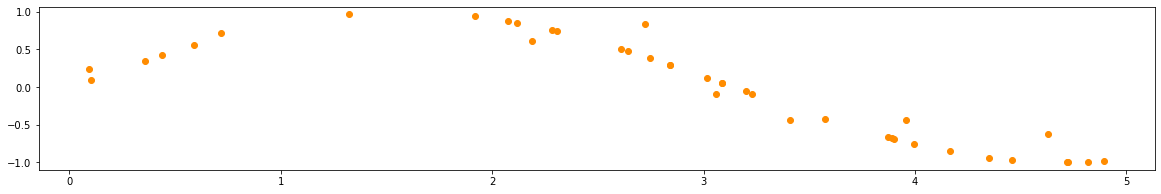

In [3]:
plt.figure(figsize=(20, 3))
plt.scatter(X, y, color='darkorange', label='data')

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:>

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, 'KNeighborsRegressor k = 10, weights =uniform')

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:>

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, 'KNeighborsRegressor k = 10, weights =distance')

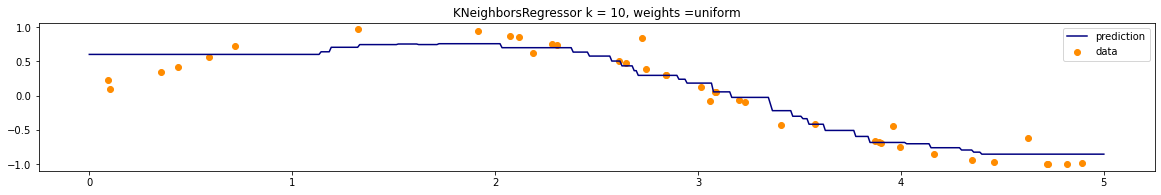

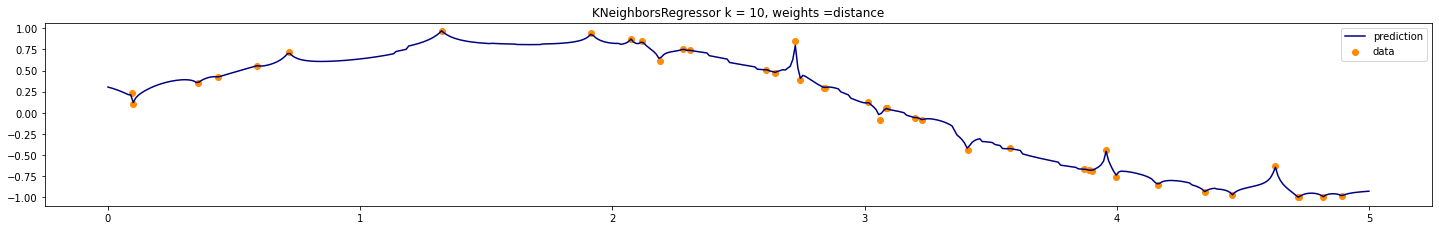

In [4]:
from sklearn import neighbors

# Fit regression model
n_neighbors = 10

for i, weights in enumerate(['uniform', 'distance']):
    
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)
    plt.figure(figsize=(20, 6))
    plt.subplot(2, 1, i + 1) # 2 x 1 그림
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title(f'KNeighborsRegressor k = {n_neighbors}, weights ={weights}')

plt.tight_layout()
plt.show()

## 1.2 classification
https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

In [5]:
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [6]:
h = .02  # step size in the mesh

# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

KNeighborsClassifier(n_neighbors=15)

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 1.0, "3-Class classification (k = 15, weights = 'uniform')")

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

KNeighborsClassifier(n_neighbors=15, weights='distance')

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 1.0, "3-Class classification (k = 15, weights = 'distance')")

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

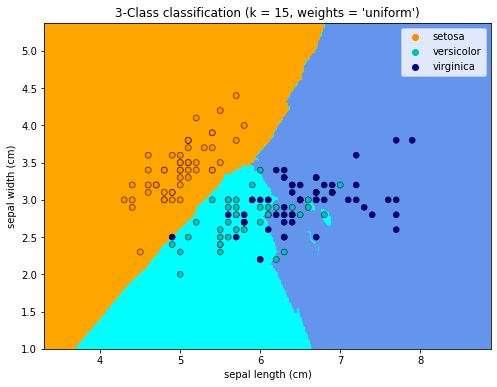

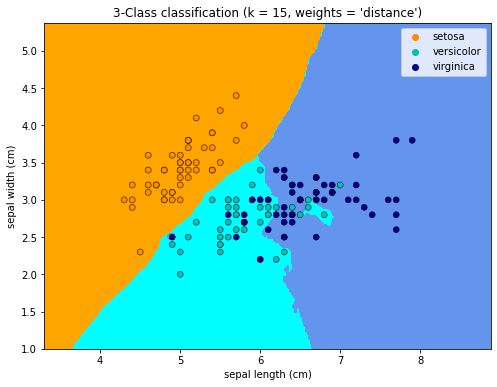

In [7]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0]); plt.ylabel(iris.feature_names[1])

plt.show()

## 1.2 Unsupervised
https://scikit-learn.org/dev/modules/neighbors.html#classification

In [16]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

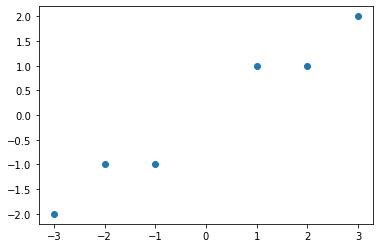

In [17]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [23]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [24]:
indices
distances

array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 0],
       [3, 4, 5],
       [4, 3, 5],
       [5, 4, 3]], dtype=int64)

array([[0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798],
       [0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798]])

In [25]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

<a id = "trick99"></a>
# 2. NB (Naive Bayseian) algorithm
## 2.1 classificstion
[Go back to the Table of Contents](#table_of_contents)

In [31]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X[0:10]
y[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

2.1.1. Gaussian Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


2.2.2. Multinomial Naive Bayes
- MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). 

2.2.3. BernoulliNB 
- implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable.

## 2.2 regression
### Bayesian Ridge Regression

Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.
- https://scikit-learn.org/dev/modules/linear_model.html#bayesian-regression

<a id = "trick98"></a>
# 3. Linear model
## 3.1 regression
[Go back to the Table of Contents](#table_of_contents)

In [55]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_

LinearRegression()

array([0.5, 0.5])

In [50]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature 단순회귀분석(Simple regresiion)
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [51]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

LinearRegression()

In [53]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


([], [])

([], [])

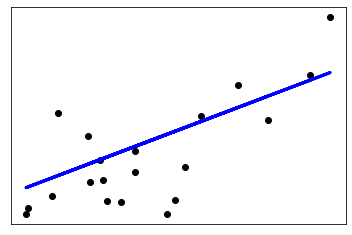

In [52]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Plot Ridge coefficients as a function of the regularization
This example also shows the usefulness of applying Ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).

In [65]:
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
X.shape
y.shape

(10, 10)

(10,)

In [66]:
pd.DataFrame(np.hstack([X, y.reshape(-1,1)]))

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.500000,0.333333,0.250000,0.200000,0.166667,0.142857,0.125000,0.111111,0.100000,1.0
1,0.500000,0.333333,0.250000,0.200000,0.166667,0.142857,0.125000,0.111111,0.100000,0.090909,1.0
2,0.333333,0.250000,0.200000,0.166667,0.142857,0.125000,0.111111,0.100000,0.090909,0.083333,1.0
3,0.250000,0.200000,0.166667,0.142857,0.125000,0.111111,0.100000,0.090909,0.083333,0.076923,1.0
4,0.200000,0.166667,0.142857,0.125000,0.111111,0.100000,0.090909,0.083333,0.076923,0.071429,1.0
5,0.166667,0.142857,0.125000,0.111111,0.100000,0.090909,0.083333,0.076923,0.071429,0.066667,1.0
6,0.142857,0.125000,0.111111,0.100000,0.090909,0.083333,0.076923,0.071429,0.066667,0.062500,1.0
7,0.125000,0.111111,0.100000,0.090909,0.083333,0.076923,0.071429,0.066667,0.062500,0.058824,1.0
8,0.111111,0.100000,0.090909,0.083333,0.076923,0.071429,0.066667,0.062500,0.058824,0.055556,1.0
9,0.100000,0.090909,0.083333,0.076923,0.071429,0.066667,0.062500,0.058824,0.055556,0.052632,1.0


In [68]:
# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

In [82]:
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

Ridge(alpha=1e-10, fit_intercept=False)

Ridge(alpha=1.0969857978923818e-10, fit_intercept=False)

Ridge(alpha=1.2033778407775904e-10, fit_intercept=False)

Ridge(alpha=1.3200884008314168e-10, fit_intercept=False)

Ridge(alpha=1.448118227674536e-10, fit_intercept=False)

Ridge(alpha=1.5885651294280527e-10, fit_intercept=False)

Ridge(alpha=1.742633386009647e-10, fit_intercept=False)

Ridge(alpha=1.9116440753857038e-10, fit_intercept=False)

Ridge(alpha=2.0970464013232307e-10, fit_intercept=False)

Ridge(alpha=2.3004301197729216e-10, fit_intercept=False)

Ridge(alpha=2.523539170434766e-10, fit_intercept=False)

Ridge(alpha=2.768286630392061e-10, fit_intercept=False)

Ridge(alpha=3.0367711180354607e-10, fit_intercept=False)

Ridge(alpha=3.33129478793467e-10, fit_intercept=False)

Ridge(alpha=3.654383070957262e-10, fit_intercept=False)

Ridge(alpha=4.0088063288984644e-10, fit_intercept=False)

Ridge(alpha=4.3976036093027124e-10, fit_intercept=False)

Ridge(alpha=4.824108704165374e-10, fit_intercept=False)

Ridge(alpha=5.291978735958437e-10, fit_intercept=False)

Ridge(alpha=5.805225516094908e-10, fit_intercept=False)

Ridge(alpha=6.368249944718586e-10, fit_intercept=False)

Ridge(alpha=6.985879746785234e-10, fit_intercept=False)

Ridge(alpha=7.663410868007463e-10, fit_intercept=False)

Ridge(alpha=8.406652885618317e-10, fit_intercept=False)

Ridge(alpha=9.221978823334341e-10, fit_intercept=False)

Ridge(alpha=1.011637979766207e-09, fit_intercept=False)

Ridge(alpha=1.10975249641207e-09, fit_intercept=False)

Ridge(alpha=1.2173827277396621e-09, fit_intercept=False)

Ridge(alpha=1.3354515629298974e-09, fit_intercept=False)

Ridge(alpha=1.4649713983072878e-09, fit_intercept=False)

Ridge(alpha=1.6070528182616385e-09, fit_intercept=False)

Ridge(alpha=1.7629141180959444e-09, fit_intercept=False)

Ridge(alpha=1.933891750455232e-09, fit_intercept=False)

Ridge(alpha=2.1214517849106276e-09, fit_intercept=False)

Ridge(alpha=2.327202478960412e-09, fit_intercept=False)

Ridge(alpha=2.5529080682395164e-09, fit_intercept=False)

Ridge(alpha=2.8005038941836253e-09, fit_intercept=False)

Ridge(alpha=3.072112998861759e-09, fit_intercept=False)

Ridge(alpha=3.3700643292719246e-09, fit_intercept=False)

Ridge(alpha=3.6969127071950323e-09, fit_intercept=False)

Ridge(alpha=4.055460735840828e-09, fit_intercept=False)

Ridge(alpha=4.448782831127577e-09, fit_intercept=False)

Ridge(alpha=4.8802515836544335e-09, fit_intercept=False)

Ridge(alpha=5.3535666774107186e-09, fit_intercept=False)

Ridge(alpha=5.872786613189489e-09, fit_intercept=False)

Ridge(alpha=6.4423635087213705e-09, fit_intercept=False)

Ridge(alpha=7.067181273927477e-09, fit_intercept=False)

Ridge(alpha=7.752597488629465e-09, fit_intercept=False)

Ridge(alpha=8.504489341802669e-09, fit_intercept=False)

Ridge(alpha=9.329304026284696e-09, fit_intercept=False)

Ridge(alpha=1.0234114021054527e-08, fit_intercept=False)

Ridge(alpha=1.1226677735108136e-08, fit_intercept=False)

Ridge(alpha=1.2315506032928261e-08, fit_intercept=False)

Ridge(alpha=1.3509935211980251e-08, fit_intercept=False)

Ridge(alpha=1.4820207057988601e-08, fit_intercept=False)

Ridge(alpha=1.6257556664437936e-08, fit_intercept=False)

Ridge(alpha=1.7834308769319092e-08, fit_intercept=False)

Ridge(alpha=1.9563983435170648e-08, fit_intercept=False)

Ridge(alpha=2.1461411978584014e-08, fit_intercept=False)

Ridge(alpha=2.3542864143224203e-08, fit_intercept=False)

Ridge(alpha=2.5826187606826747e-08, fit_intercept=False)

Ridge(alpha=2.8330961018393243e-08, fit_intercept=False)

Ridge(alpha=3.107866187782014e-08, fit_intercept=False)

Ridge(alpha=3.4092850697468076e-08, fit_intercept=False)

Ridge(alpha=3.7399373024788015e-08, fit_intercept=False)

Ridge(alpha=4.1026581058271906e-08, fit_intercept=False)

Ridge(alpha=4.5005576757004975e-08, fit_intercept=False)

Ridge(alpha=4.9370478528390036e-08, fit_intercept=False)

Ridge(alpha=5.415871378079465e-08, fit_intercept=False)

Ridge(alpha=5.94113398496504e-08, fit_intercept=False)

Ridge(alpha=6.51733960488242e-08, fit_intercept=False)

Ridge(alpha=7.149428986597577e-08, fit_intercept=False)

Ridge(alpha=7.842822061337681e-08, fit_intercept=False)

Ridge(alpha=8.603464416684492e-08, fit_intercept=False)

Ridge(alpha=9.437878277775391e-08, fit_intercept=False)

Ridge(alpha=1.0353218432956616e-07, fit_intercept=False)

Ridge(alpha=1.1357333583431052e-07, fit_intercept=False)

Ridge(alpha=1.2458833642950082e-07, fit_intercept=False)

Ridge(alpha=1.3667163564620074e-07, fit_intercept=False)

Ridge(alpha=1.499268432786047e-07, fit_intercept=False)

Ridge(alpha=1.6446761779946628e-07, fit_intercept=False)

Ridge(alpha=1.804186409392072e-07, fit_intercept=False)

Ridge(alpha=1.9791668678535572e-07, fit_intercept=False)

Ridge(alpha=2.1711179456945052e-07, fit_intercept=False)

Ridge(alpha=2.3816855519761606e-07, fit_intercept=False)

Ridge(alpha=2.6126752255633264e-07, fit_intercept=False)

Ridge(alpha=2.8660676169482504e-07, fit_intercept=False)

Ridge(alpha=3.1440354715915e-07, fit_intercept=False)

Ridge(alpha=3.44896226040576e-07, fit_intercept=False)

Ridge(alpha=3.783462617131933e-07, fit_intercept=False)

Ridge(alpha=4.1504047578504725e-07, fit_intercept=False)

Ridge(alpha=4.5529350748669477e-07, fit_intercept=False)

Ridge(alpha=4.99450511585514e-07, fit_intercept=False)

Ridge(alpha=5.478901179593945e-07, fit_intercept=False)

Ridge(alpha=6.010276782070388e-07, fit_intercept=False)

Ridge(alpha=6.593188271333542e-07, fit_intercept=False)

Ridge(alpha=7.232633896483533e-07, fit_intercept=False)

Ridge(alpha=7.934096665797492e-07, fit_intercept=False)

Ridge(alpha=8.703591361485166e-07, fit_intercept=False)

Ridge(alpha=9.547716114208066e-07, fit_intercept=False)

Ridge(alpha=1.0473708979594487e-06, fit_intercept=False)

Ridge(alpha=1.1489510001873085e-06, fit_intercept=False)

Ridge(alpha=1.2603829296797275e-06, fit_intercept=False)

Ridge(alpha=1.3826221737646564e-06, fit_intercept=False)

Ridge(alpha=1.5167168884709241e-06, fit_intercept=False)

Ridge(alpha=1.6638168860761274e-06, fit_intercept=False)

Ridge(alpha=1.8251834943190425e-06, fit_intercept=False)

Ridge(alpha=2.0022003718155846e-06, fit_intercept=False)

Ridge(alpha=2.196385372416547e-06, fit_intercept=False)

Ridge(alpha=2.409403560239527e-06, fit_intercept=False)

Ridge(alpha=2.6430814869741083e-06, fit_intercept=False)

Ridge(alpha=2.899422853882875e-06, fit_intercept=False)

Ridge(alpha=3.1806256927941193e-06, fit_intercept=False)

Ridge(alpha=3.489101213406774e-06, fit_intercept=False)

Ridge(alpha=3.827494478516315e-06, fit_intercept=False)

Ridge(alpha=4.198707084443915e-06, fit_intercept=False)

Ridge(alpha=4.6059220411451036e-06, fit_intercept=False)

Ridge(alpha=5.05263106533568e-06, fit_intercept=False)

Ridge(alpha=5.542664520663107e-06, fit_intercept=False)

Ridge(alpha=6.080224261649427e-06, fit_intercept=False)

Ridge(alpha=6.669919663030128e-06, fit_intercept=False)

Ridge(alpha=7.316807143427192e-06, fit_intercept=False)

Ridge(alpha=8.026433522257175e-06, fit_intercept=False)

Ridge(alpha=8.804883581643465e-06, fit_intercept=False)

Ridge(alpha=9.658832241158709e-06, fit_intercept=False)

Ridge(alpha=1.059560179277617e-05, fit_intercept=False)

Ridge(alpha=1.1623224686798518e-05, fit_intercept=False)

Ridge(alpha=1.2750512407130129e-05, fit_intercept=False)

Ridge(alpha=1.3987131026472387e-05, fit_intercept=False)

Ridge(alpha=1.5343684089300132e-05, fit_intercept=False)

Ridge(alpha=1.6831803533309584e-05, fit_intercept=False)

Ridge(alpha=1.8464249428955424e-05, fit_intercept=False)

Ridge(alpha=2.0255019392306664e-05, fit_intercept=False)

Ridge(alpha=2.2219468609395237e-05, fit_intercept=False)

Ridge(alpha=2.4374441501222216e-05, fit_intercept=False)

Ridge(alpha=2.6738416158399493e-05, fit_intercept=False)

Ridge(alpha=2.9331662783900422e-05, fit_intercept=False)

Ridge(alpha=3.217641750250736e-05, fit_intercept=False)

Ridge(alpha=3.52970730273065e-05, fit_intercept=False)

Ridge(alpha=3.872038781812557e-05, fit_intercept=False)

Ridge(alpha=4.2475715525369026e-05, fit_intercept=False)

Ridge(alpha=4.6595256686646775e-05, fit_intercept=False)

Ridge(alpha=5.111433483440165e-05, fit_intercept=False)

Ridge(alpha=5.607169938205458e-05, fit_intercept=False)

Ridge(alpha=6.150985788580505e-05, fit_intercept=False)

Ridge(alpha=6.7475440531107e-05, fit_intercept=False)

Ridge(alpha=7.401959996915637e-05, fit_intercept=False)

Ridge(alpha=8.11984499318401e-05, fit_intercept=False)

Ridge(alpha=8.90735463861044e-05, fit_intercept=False)

Ridge(alpha=9.771241535346502e-05, fit_intercept=False)

Ridge(alpha=0.00010718913192051286, fit_intercept=False)

Ridge(alpha=0.00011758495540521582, fit_intercept=False)

Ridge(alpha=0.0001289890261253308, fit_intercept=False)

Ridge(alpha=0.00014149912974345758, fit_intercept=False)

Ridge(alpha=0.0001552225357427048, fit_intercept=False)

Ridge(alpha=0.00017027691722259014, fit_intercept=False)

Ridge(alpha=0.00018679135990207847, fit_intercept=False)

Ridge(alpha=0.0002049074689815846, fit_intercept=False)

Ridge(alpha=0.00022478058335487252, fit_intercept=False)

Ridge(alpha=0.0002465811075822604, fit_intercept=False)

Ridge(alpha=0.0002704959730463137, fit_intercept=False)

Ridge(alpha=0.0002967302408188873, fit_intercept=False)

Ridge(alpha=0.00032550885998350565, fit_intercept=False)

Ridge(alpha=0.00035707859649004625, fit_intercept=False)

Ridge(alpha=0.00039171014908092607, fit_intercept=False)

Ridge(alpha=0.0004297004704320844, fit_intercept=False)

Ridge(alpha=0.00047137531341167287, fit_intercept=False)

Ridge(alpha=0.0005170920242896756, fit_intercept=False)

Ridge(alpha=0.0005672426068491978, fit_intercept=False)

Ridge(alpha=0.0006222570836730231, fit_intercept=False)

Ridge(alpha=0.0006826071834272392, fit_intercept=False)

Ridge(alpha=0.000748810385759003, fit_intercept=False)

Ridge(alpha=0.0008214343584919422, fit_intercept=False)

Ridge(alpha=0.0009011018251665018, fit_intercept=False)

Ridge(alpha=0.0009884959046625587, fit_intercept=False)

Ridge(alpha=0.0010843659686896108, fit_intercept=False)

Ridge(alpha=0.0011895340673703208, fit_intercept=False)

Ridge(alpha=0.0013049019780144017, fit_intercept=False)

Ridge(alpha=0.0014314589375234786, fit_intercept=False)

Ridge(alpha=0.0015702901247293774, fit_intercept=False)

Ridge(alpha=0.0017225859653987874, fit_intercept=False)

Ridge(alpha=0.0018896523396912115, fit_intercept=False)

Ridge(alpha=0.0020729217795953697, fit_intercept=False)

Ridge(alpha=0.0022739657523579274, fit_intercept=False)

Ridge(alpha=0.0024945081352303164, fit_intercept=False)

Ridge(alpha=0.0027364399970746718, fit_intercept=False)

Ridge(alpha=0.0030018358135755923, fit_intercept=False)

Ridge(alpha=0.0032929712550971483, fit_intercept=False)

Ridge(alpha=0.0036123426997094303, fit_intercept=False)

Ridge(alpha=0.003962688638701479, fit_intercept=False)

Ridge(alpha=0.004347013158125026, fit_intercept=False)

Ridge(alpha=0.004768611697714475, fit_intercept=False)

Ridge(alpha=0.005231099308056258, fit_intercept=False)

Ridge(alpha=0.005738441648302393, fit_intercept=False)

Ridge(alpha=0.006294988990221888, fit_intercept=False)

Ridge(alpha=0.006905513520162331, fit_intercept=False)

Ridge(alpha=0.00757525025877192, fit_intercept=False)

Ridge(alpha=0.008309941949353404, fit_intercept=False)

Ridge(alpha=0.009115888299750819, fit_intercept=False)

Ridge(alpha=0.01, fit_intercept=False)

(0.025118864315095794, 3.9810717055349695e-11)

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'weights')

Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

(0.025118864315095794,
 3.9810717055349695e-11,
 -198.10224238464698,
 296.5051942495843)

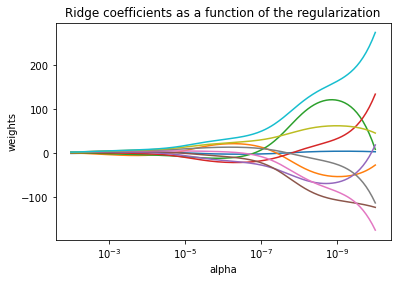

In [83]:
# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

<a id = "trick97"></a>
# 4. Support Vector model
## 4.1 support vector classification
- Support Vector Machine algorithms are not scale invariant, so it is <font color='red'>highly recommended to scale your data.

- from sklearn.pipeline import make_pipeline
- from sklearn.preprocessing import StandardScaler
- from sklearn.svm import SVC
- clf = make_pipeline(StandardScaler(), SVC())

- [Go back to the Table of Contents](#table_of_contents)

In [92]:
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

[]

[]

Text(0.5, 1.0, 'SVC with linear kernel')

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

[]

[]

Text(0.5, 1.0, 'LinearSVC (linear kernel)')

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

[]

[]

Text(0.5, 1.0, 'SVC with RBF kernel')

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

[]

[]

Text(0.5, 1.0, 'SVC with polynomial (degree 3) kernel')

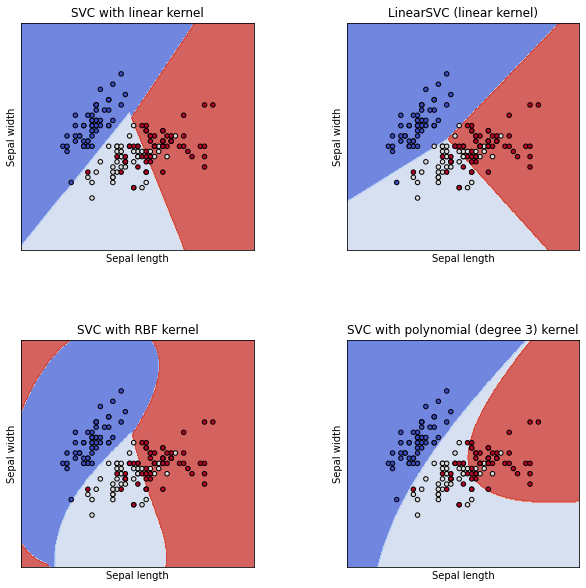

In [97]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')


# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## 4.1 support vector regresion

In [100]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)

regr.predict([[1, 1]])

SVR()

array([1.5])

<a id = "trick96"></a>
# 5. Decision tree model
## 5.1 classification
[Go back to the Table of Contents](#table_of_contents)

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

In [112]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9823000000000001

In [114]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9997

In [115]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

True

## 5.2 regression

In [116]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

DecisionTreeRegressor(max_depth=2)

DecisionTreeRegressor(max_depth=5)

DecisionTreeRegressor(max_depth=10)

<Figure size 1440x576 with 0 Axes>

Text(0.5, 0, 'data')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 'Decision Tree Regression')

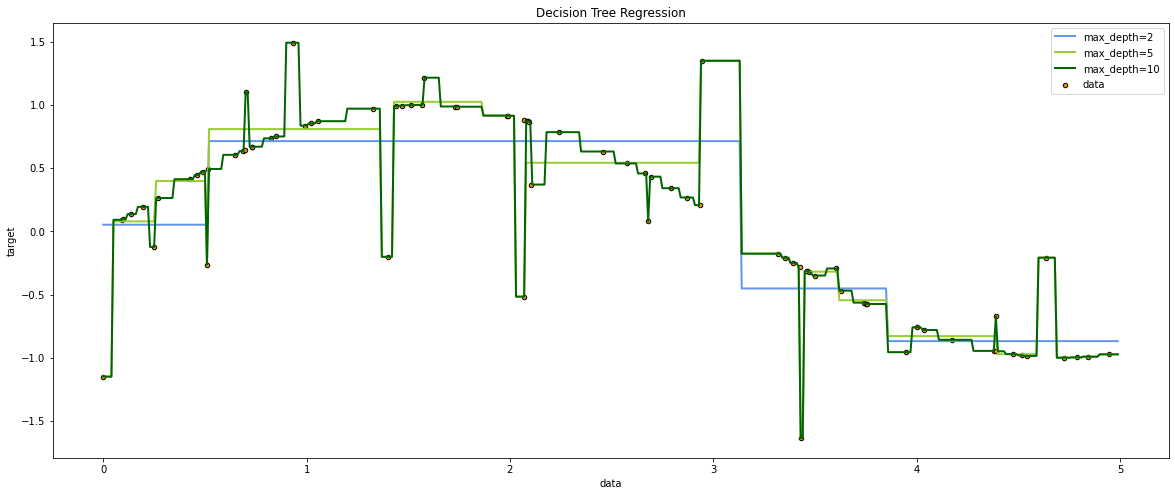

In [122]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure(figsize=(20, 8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="darkgreen", label="max_depth=10", linewidth=2)

plt.xlabel("data"); plt.ylabel("target")
plt.title("Decision Tree Regression"); plt.legend()
plt.show()

# End

### mushroom data로 5가지 알고리즘으로예측 성능 비교 (과제)